# 250A Project - Predicting Basketball Game Outcomes with Bayesian Networks


In [80]:
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt

## Data Loading and EDA

In [2]:
# Only if you wanna download the original dataset and query with sql
# theres also a play_by_play.csv file that was too big to push but ion think we need it
#------------------------------------------------------------------------------------------------
# path = kagglehub.dataset_download("wyattowalsh/basketball")

# print("Path to dataset files:", path)

### DataFrame Descriptions

In [ ]:
data_folder = '../data'
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv') and f != 'play_by_play.csv']

print("CSV tables and their descriptions:\n")

for csv_file in csv_files:
    path = os.path.join(data_folder, csv_file)
    try:
        df = pd.read_csv(path, nrows=5)
        print(f"Table: {csv_file}")
        print("Columns:", list(df.columns))
        print(df.head())
        print("\n" + "-"*60 + "\n")
    except Exception as e:
        print(f"Could not read {csv_file}: {e}\n")



CSV tables and their descriptions:

Table: game_info.csv
Columns: ['game_id', 'game_date', 'attendance', 'game_time']
    game_id            game_date  attendance  game_time
0  24600001  1946-11-01 00:00:00         NaN        NaN
1  24600003  1946-11-02 00:00:00         NaN        NaN
2  24600002  1946-11-02 00:00:00         NaN        NaN
3  24600004  1946-11-02 00:00:00         NaN        NaN
4  24600005  1946-11-02 00:00:00         NaN        NaN

------------------------------------------------------------

Table: player.csv
Columns: ['id', 'full_name', 'first_name', 'last_name', 'is_active']
      id            full_name first_name     last_name  is_active
0  76001       Alaa Abdelnaby       Alaa     Abdelnaby          0
1  76002      Zaid Abdul-Aziz       Zaid    Abdul-Aziz          0
2  76003  Kareem Abdul-Jabbar     Kareem  Abdul-Jabbar          0
3     51   Mahmoud Abdul-Rauf    Mahmoud    Abdul-Rauf          0
4   1505    Tariq Abdul-Wahad      Tariq   Abdul-Wahad          0


In [5]:
players = pd.read_csv('../data/player.csv')

In [9]:
active_players = players[players['is_active'] == 1]
active_players

,id,full_name,first_name,last_name,is_active
10,1630173,Precious Achiuwa,Precious,Achiuwa,1
22,203500,Steven Adams,Steven,Adams,1
24,1628389,Bam Adebayo,Bam,Adebayo,1
29,1630534,Ochai Agbaji,Ochai,Agbaji,1
41,1630583,Santi Aldama,Santi,Aldama,1
...,...,...,...,...,...
4806,201152,Thaddeus Young,Thaddeus,Young,1
4808,1629027,Trae Young,Trae,Young,1
4809,1630209,Omer Yurtseven,Omer,Yurtseven,1
4812,203469,Cody Zeller,Cody,Zeller,1


In [15]:
games = pd.read_csv('../data/game.csv')
games.sort_values('game_date').tail(20)

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
65675,42022,1610612755,PHI,Philadelphia 76ers,42200216,2023-05-11 00:00:00,PHI vs. BOS,L,240,30.0,...,50.0,22.0,7.0,6.0,18.0,14.0,95.0,9,1,Playoffs
65677,42022,1610612747,LAL,Los Angeles Lakers,42200236,2023-05-12 00:00:00,LAL vs. GSW,W,240,39.0,...,53.0,25.0,3.0,2.0,11.0,30.0,101.0,-21,1,Playoffs
65678,42022,1610612748,MIA,Miami Heat,42200206,2023-05-12 00:00:00,MIA vs. NYK,W,240,33.0,...,41.0,13.0,2.0,9.0,12.0,22.0,92.0,-4,1,Playoffs
65679,42022,1610612738,BOS,Boston Celtics,42200217,2023-05-14 00:00:00,BOS vs. PHI,W,240,41.0,...,37.0,15.0,4.0,7.0,14.0,14.0,88.0,-24,1,Playoffs
65680,42022,1610612743,DEN,Denver Nuggets,42200311,2023-05-16 00:00:00,DEN vs. LAL,W,240,50.0,...,30.0,30.0,6.0,4.0,7.0,21.0,126.0,-6,1,Playoffs
65681,42022,1610612738,BOS,Boston Celtics,42200301,2023-05-17 00:00:00,BOS vs. MIA,L,240,42.0,...,35.0,20.0,12.0,3.0,15.0,22.0,123.0,7,1,Playoffs
65682,42022,1610612743,DEN,Denver Nuggets,42200312,2023-05-18 00:00:00,DEN vs. LAL,W,240,39.0,...,40.0,26.0,10.0,7.0,12.0,19.0,103.0,-5,1,Playoffs
65683,42022,1610612738,BOS,Boston Celtics,42200302,2023-05-19 00:00:00,BOS vs. MIA,L,240,37.0,...,45.0,23.0,9.0,5.0,11.0,17.0,111.0,6,1,Playoffs
65684,42022,1610612747,LAL,Los Angeles Lakers,42200313,2023-05-20 00:00:00,LAL vs. DEN,L,240,38.0,...,39.0,30.0,7.0,1.0,6.0,19.0,119.0,11,1,Playoffs
65685,42022,1610612748,MIA,Miami Heat,42200303,2023-05-21 00:00:00,MIA vs. BOS,W,240,46.0,...,57.0,25.0,3.0,3.0,15.0,24.0,102.0,-26,1,Playoffs


In [16]:
games.describe()

,season_id,team_id_home,game_id,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
count,65698.000000,6.569800e+04,6.569800e+04,65698.000000,65685.000000,50251.000000,50208.000000,52480.000000,47015.000000,46624.000000,...,46700.000000,49973.000000,49897.000000,46849.000000,47073.000000,47013.000000,62847.000000,65698.000000,65698.000000,65698.000000
mean,22949.338747,1.609926e+09,2.584747e+07,221.003486,39.672269,83.992796,0.467321,5.735099,17.741146,0.346136,...,30.238073,42.119645,22.135419,7.854148,4.681537,15.199860,23.097284,100.991567,-3.627569,0.201330
std,5000.305500,3.324313e+07,6.303760e+06,67.903521,6.770802,9.164445,0.059423,4.537337,10.545810,0.151234,...,5.588675,6.867396,5.380805,3.031766,2.500820,4.299798,5.227208,14.418755,13.091395,0.400997
min,12005.000000,4.500000e+01,1.050000e+07,0.000000,4.000000,0.000000,0.140000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,-73.000000,0.000000
25%,21981.000000,1.610613e+09,2.130053e+07,240.000000,35.000000,78.000000,0.427000,2.000000,10.000000,0.261000,...,26.000000,37.000000,18.000000,6.000000,3.000000,12.000000,20.000000,92.000000,-12.000000,0.000000
50%,21997.000000,1.610613e+09,2.630007e+07,240.000000,40.000000,84.000000,0.467000,5.000000,16.000000,0.348000,...,30.000000,42.000000,22.000000,8.000000,4.000000,15.000000,23.000000,101.000000,-4.000000,0.000000
75%,22011.000000,1.610613e+09,2.880069e+07,240.000000,44.000000,89.000000,0.506000,9.000000,24.000000,0.429750,...,34.000000,47.000000,26.000000,10.000000,6.000000,18.000000,26.000000,110.000000,5.000000,0.000000
max,42022.000000,1.610617e+09,4.980009e+07,365.000000,84.000000,240.000000,0.697000,28.000000,77.000000,1.000000,...,60.000000,90.000000,89.000000,27.000000,19.000000,40.000000,115.000000,196.000000,68.000000,1.000000


In [35]:
games

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07 00:00:00,MIA vs. DEN,L,240,34.0,...,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09 00:00:00,MIA vs. DEN,L,240,35.0,...,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12 00:00:00,DEN vs. MIA,W,240,38.0,...,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,1,Playoffs
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,L,221,79.0,...,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All-Star


In [32]:
games.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away',
       'season_type'],
      dtype='object')

### Procesed games.csv


In [ ]:
games_modern = games[games['game_date'] >= '2003-09-01']
games_reg_szn = games_modern[games_modern['season_type'] == 'Regular Season']
games_reg_szn = games_reg_szn.fillna(0) # was for a game with zero attempted 3 pointers

# Remove each team's first 10 games (per season) from games_reg_szn (as no recent 10 game form data)
# Ensure the game_date is datetime for correct sorting
games_reg_szn['game_date'] = pd.to_datetime(games_reg_szn['game_date'])

# For HOME games: create a mask for games that are NOT the first 10 for each team per season (by team_id_home)
games_reg_szn = games_reg_szn.sort_values(['season_id', 'team_id_home', 'game_date'])
games_reg_szn['home_game_number'] = games_reg_szn.groupby(['season_id', 'team_id_home']).cumcount() + 1

# For AWAY games: create a mask for games that are NOT the first 10 for each team per season (by team_id_away)
games_reg_szn = games_reg_szn.sort_values(['season_id', 'team_id_away', 'game_date'])
games_reg_szn['away_game_number'] = games_reg_szn.groupby(['season_id', 'team_id_away']).cumcount() + 1

# Keep only games where both home and away teams have played more than 10 games that season
games_reg_szn = games_reg_szn[(games_reg_szn['home_game_number'] > 10) & (games_reg_szn['away_game_number'] > 10)]

# Optionally drop the helper columns if no longer needed
games_reg_szn = games_reg_szn.drop(columns=['home_game_number', 'away_game_number'])



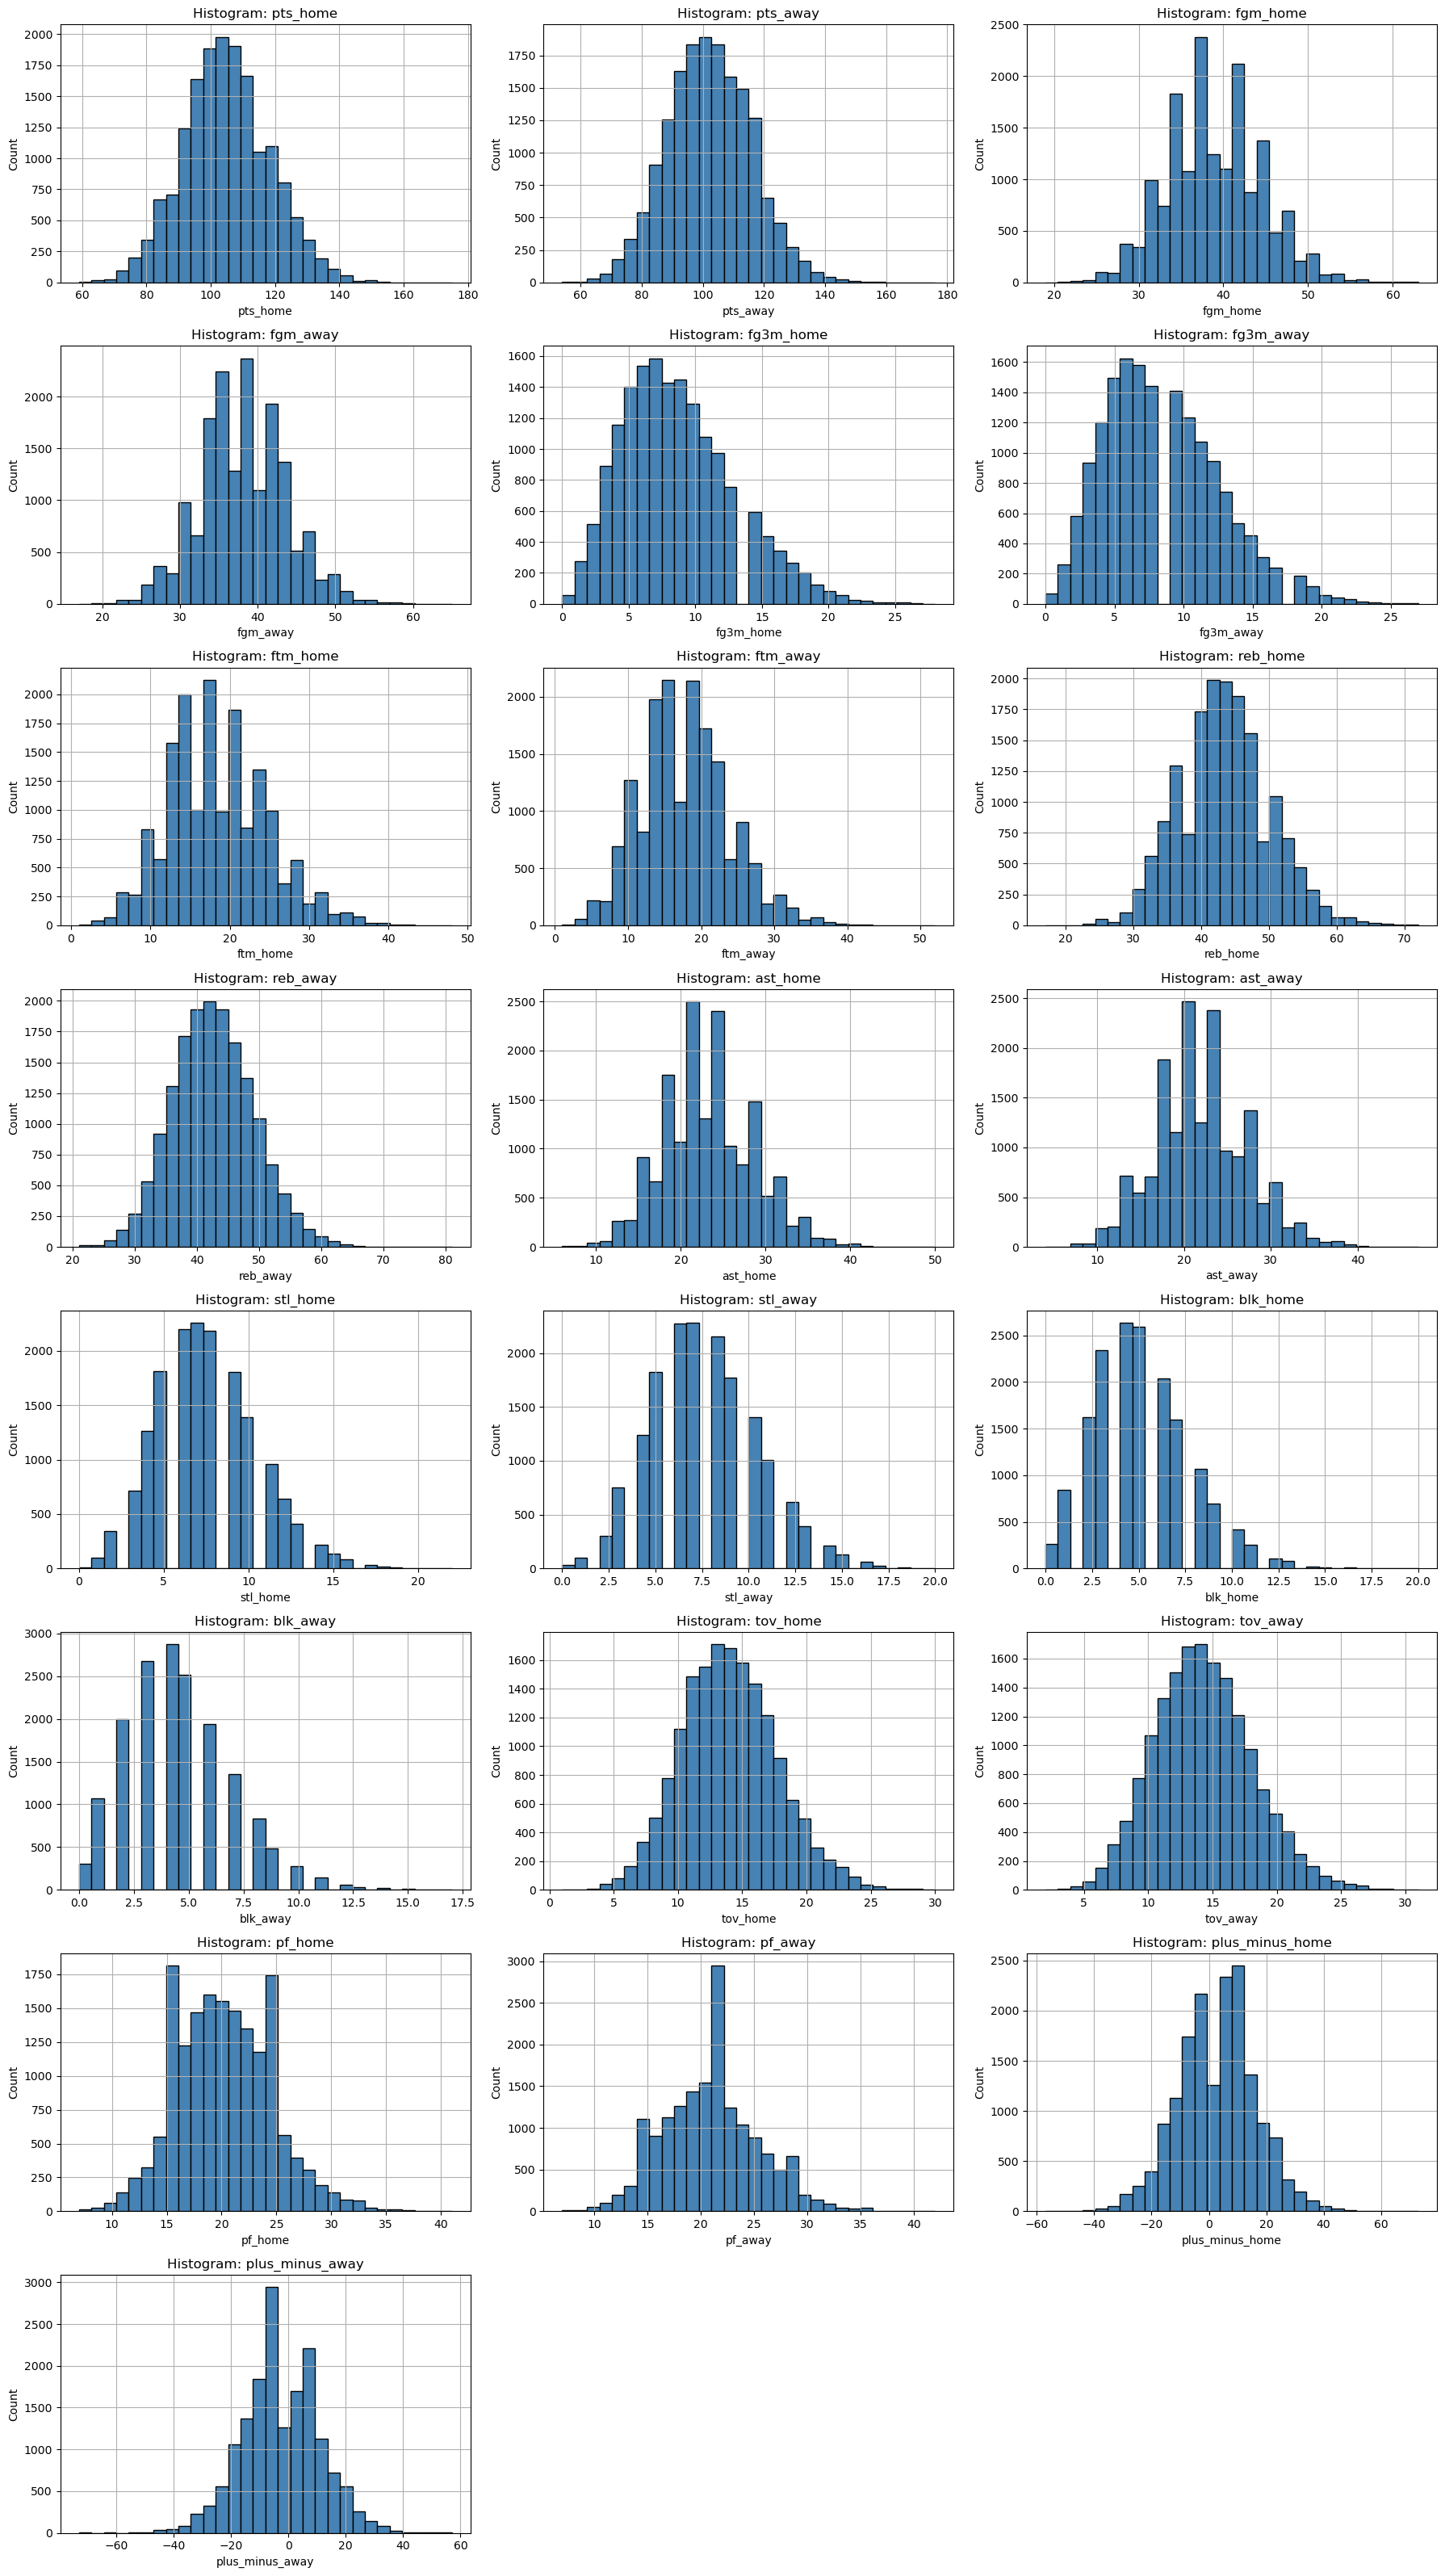

In [81]:
# List some representative numerical features for histogramming
hist_features = [
    'pts_home', 'pts_away', 'fgm_home', 'fgm_away', 
    'fg3m_home', 'fg3m_away', 'ftm_home', 'ftm_away',
    'reb_home', 'reb_away', 'ast_home', 'ast_away', 
    'stl_home', 'stl_away', 'blk_home', 'blk_away',
    'tov_home', 'tov_away', 'pf_home', 'pf_away',
    'plus_minus_home', 'plus_minus_away'
]

# Filter the list to those columns actually present
hist_features = [f for f in hist_features if f in games_reg_szn.columns]

# Plot histograms for each feature, with sensible binning and layout
n_cols = 3
n_rows = (len(hist_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
axes = axes.flatten()

for i, feat in enumerate(hist_features):
    ax = axes[i]
    games_reg_szn[feat].hist(bins=30, ax=ax, color='#4682b4', edgecolor='black')
    ax.set_title(f'Histogram: {feat}')
    ax.set_xlabel(feat)
    ax.set_ylabel('Count')
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [66]:
common_player_info = pd.read_csv('../data/common_player_info.csv')
common_player_info.columns


Index(['person_id', 'first_name', 'last_name', 'display_first_last',
       'display_last_comma_first', 'display_fi_last', 'player_slug',
       'birthdate', 'school', 'country', 'last_affiliation', 'height',
       'weight', 'season_exp', 'jersey', 'position', 'rosterstatus',
       'games_played_current_season_flag', 'team_id', 'team_name',
       'team_abbreviation', 'team_code', 'team_city', 'playercode',
       'from_year', 'to_year', 'dleague_flag', 'nba_flag', 'games_played_flag',
       'draft_year', 'draft_round', 'draft_number', 'greatest_75_flag'],
      dtype='object')

In [67]:
common_player_info.tail(10)

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
4161,78644,Phil,Zevenbergen,Phil Zevenbergen,"Zevenbergen, Phil",P. Zevenbergen,phil-zevenbergen,1964-04-13 00:00:00,Washington,USA,...,HISTADD_phil_zevenbergen,1987.0,1987.0,N,Y,Y,1987,3,50,N
4162,1917,Wang,Zhi-zhi,Wang Zhi-zhi,"Zhi-zhi, Wang",W. Zhi-zhi,wang-zhi-zhi,1977-07-08 00:00:00,Bayi,China,...,wang_zhi-zhi,2000.0,2004.0,N,Y,Y,1999,2,36,N
4163,678,George,Zidek,George Zidek,"Zidek, George",G. Zidek,george-zidek,1973-08-02 00:00:00,UCLA,USA,...,george_zidek,1995.0,1997.0,N,Y,Y,1995,1,22,N
4164,2583,Derrick,Zimmerman,Derrick Zimmerman,"Zimmerman, Derrick",D. Zimmerman,derrick-zimmerman,1981-12-02 00:00:00,Mississippi State,USA,...,derrick_zimmerman,2005.0,2005.0,Y,Y,Y,2003,2,40,N
4165,1627757,Stephen,Zimmerman,Stephen Zimmerman,"Zimmerman, Stephen",S. Zimmerman,stephen-zimmerman,1996-09-09 00:00:00,UNLV,USA,...,stephen_zimmerman,2016.0,2016.0,Y,Y,Y,2016,2,41,N
4166,1627835,Paul,Zipser,Paul Zipser,"Zipser, Paul",P. Zipser,paul-zipser,1994-02-18 00:00:00,Bayern Munich,Germany,...,paul_zipser,2016.0,2017.0,Y,Y,Y,2016,2,48,N
4167,1627790,Ante,Zizic,Ante Zizic,"Zizic, Ante",A. Zizic,ante-zizic,1997-01-04 00:00:00,Darussafaka,Croatia,...,ante_zizic,2017.0,2019.0,Y,Y,Y,2016,1,23,N
4168,78647,Jim,Zoet,Jim Zoet,"Zoet, Jim",J. Zoet,jim-zoet,1953-12-30 00:00:00,Kent State,USA,...,HISTADD_jim_zoet,1982.0,1982.0,N,Y,Y,Undrafted,Undrafted,Undrafted,N
4169,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18 00:00:00,Mega Basket,Croatia,...,ivica_zubac,2016.0,2023.0,Y,Y,Y,2016,2,32,N
4170,78650,Matt,Zunic,Matt Zunic,"Zunic, Matt",M. Zunic,matt-zunic,1919-12-19 00:00:00,George Washington,USA,...,HISTADD_matt_zunic,1948.0,1948.0,N,Y,Y,1947,NaN,NaN,N


In [68]:
players.tail(10)

,id,full_name,first_name,last_name,is_active
4821,1627753,Zhou Qi,NaN,Zhou Qi,0
4822,678,George Zidek,George,Zidek,0
4823,2583,Derrick Zimmerman,Derrick,Zimmerman,0
4824,1627757,Stephen Zimmerman,Stephen,Zimmerman,0
4825,1627835,Paul Zipser,Paul,Zipser,0
4826,1627790,Ante Zizic,Ante,Zizic,0
4827,78647,Jim Zoet,Jim,Zoet,0
4828,78648,Bill Zopf,Bill,Zopf,0
4829,1627826,Ivica Zubac,Ivica,Zubac,1
4830,78650,Matt Zunic,Matt,Zunic,0


In [69]:
other_stats = pd.read_csv('../data/other_stats.csv')
other_stats.columns

Index(['game_id', 'league_id', 'team_id_home', 'team_abbreviation_home',
       'team_city_home', 'pts_paint_home', 'pts_2nd_chance_home',
       'pts_fb_home', 'largest_lead_home', 'lead_changes', 'times_tied',
       'team_turnovers_home', 'total_turnovers_home', 'team_rebounds_home',
       'pts_off_to_home', 'team_id_away', 'team_abbreviation_away',
       'team_city_away', 'pts_paint_away', 'pts_2nd_chance_away',
       'pts_fb_away', 'largest_lead_away', 'team_turnovers_away',
       'total_turnovers_away', 'team_rebounds_away', 'pts_off_to_away'],
      dtype='object')

In [84]:
other_stats.describe()

,game_id,league_id,team_id_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,team_turnovers_home,...,pts_off_to_home,team_id_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away,pts_off_to_away
count,2.827100e+04,28271.0,2.827100e+04,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28269.000000,...,26148.000000,2.827100e+04,28271.000000,28271.000000,28271.000000,28271.000000,28269.000000,27955.000000,26273.000000,26148.000000
mean,2.314451e+07,0.0,1.608619e+09,41.904496,13.243889,13.006119,11.949383,6.075378,5.098086,0.628745,...,15.227551,1.609416e+09,41.658307,13.328145,12.882424,11.641046,0.633344,14.595421,8.461006,15.329050
std,5.886506e+06,0.0,5.663573e+07,10.566933,5.405389,6.675118,9.148112,5.287184,4.105700,0.808296,...,7.116555,4.388075e+07,10.450258,5.402271,6.544709,9.010137,0.820544,4.063812,3.105498,7.195931
min,1.100000e+07,0.0,4.100000e+01,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.100000e+01,8.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.060030e+07,0.0,1.610613e+09,34.000000,9.000000,8.000000,5.000000,2.000000,2.000000,0.000000,...,11.000000,1.610613e+09,34.000000,10.000000,8.000000,5.000000,0.000000,12.000000,6.000000,11.000000
50%,2.140031e+07,0.0,1.610613e+09,42.000000,13.000000,12.000000,10.000000,5.000000,4.000000,0.000000,...,15.000000,1.610613e+09,42.000000,13.000000,12.000000,10.000000,0.000000,14.000000,8.000000,15.000000
75%,2.210032e+07,0.0,1.610613e+09,48.000000,17.000000,17.000000,17.000000,9.000000,8.000000,1.000000,...,20.000000,1.610613e+09,48.000000,17.000000,17.000000,17.000000,1.000000,17.000000,10.000000,20.000000
max,4.980009e+07,0.0,1.610617e+09,120.000000,37.000000,106.000000,70.000000,40.000000,29.000000,6.000000,...,47.000000,1.610617e+09,108.000000,38.000000,107.000000,78.000000,7.000000,33.000000,24.000000,44.000000


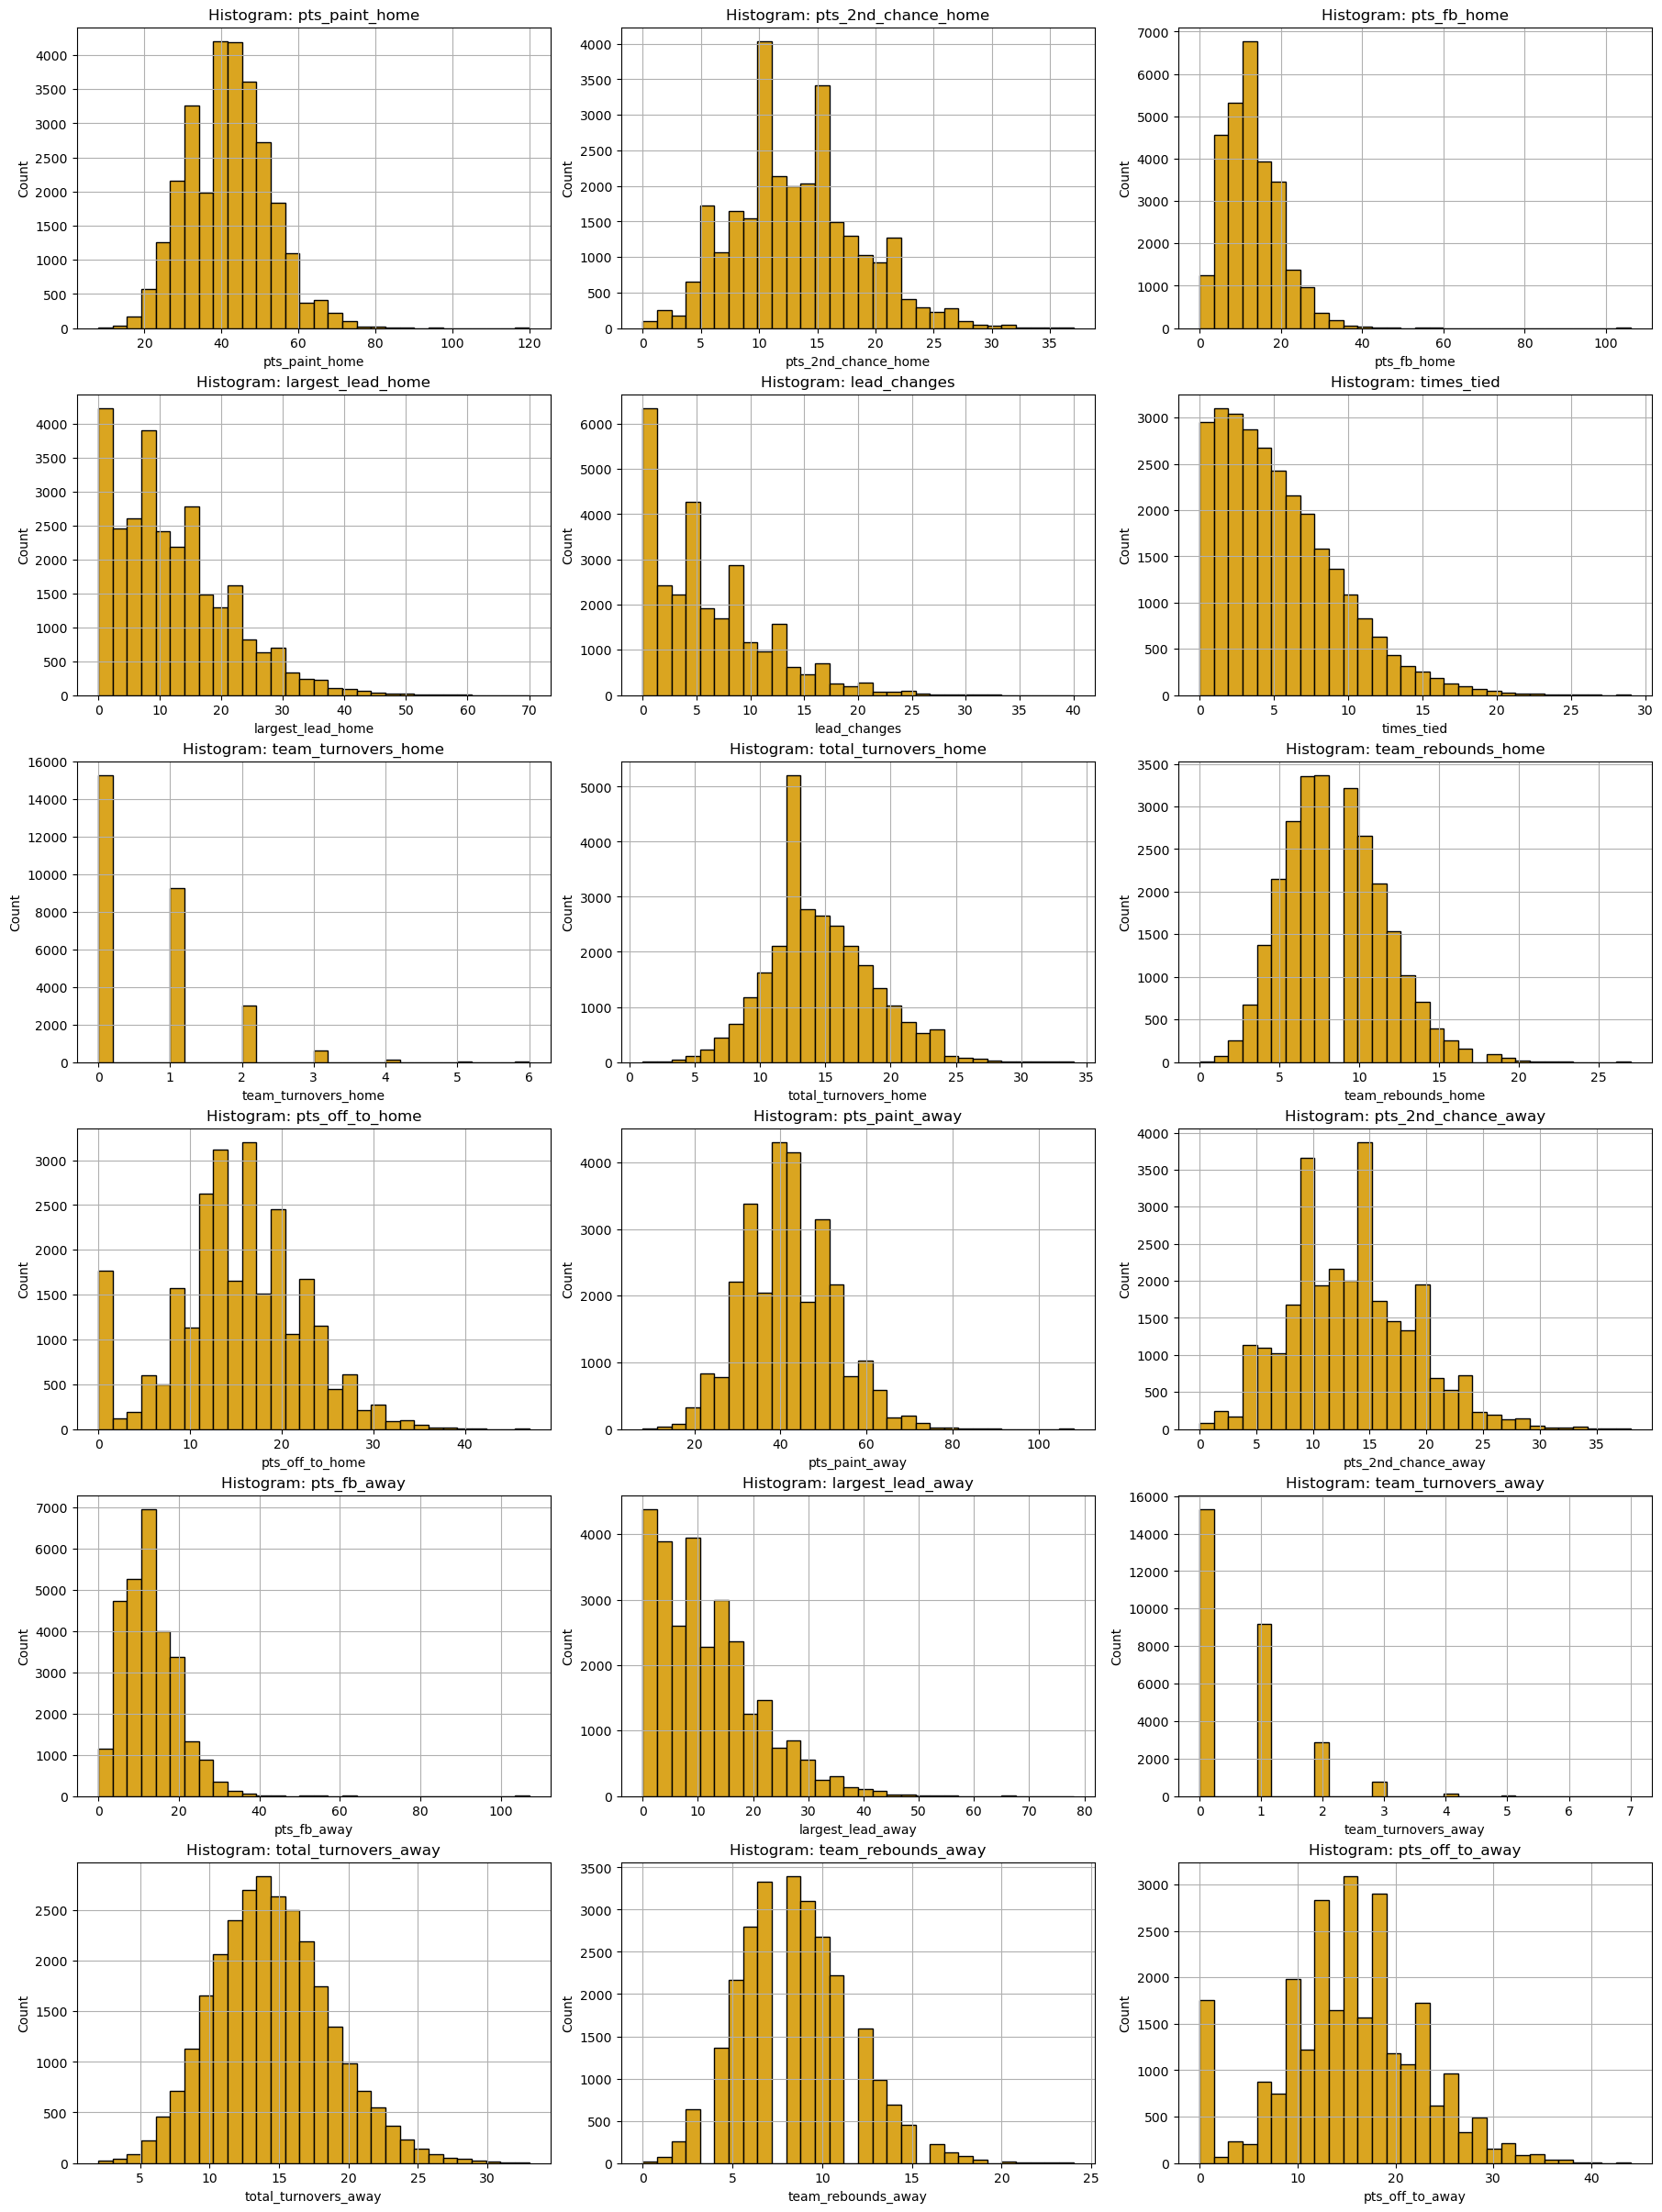

In [ ]:
# Histograms for other_stats
other_stats_numeric = other_stats.select_dtypes(include=['number'])
hist_features_other = [col for col in other_stats_numeric.columns if col not in ['game_id', 'league_id', 'team_id_home', 'team_id_away']]

n_cols = 3
n_rows = (len(hist_features_other) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, feat in enumerate(hist_features_other):
    ax = axes[i]
    other_stats[feat].dropna().hist(bins=30, ax=ax, color='#daa520', edgecolor='black')
    ax.set_title(f'Histogram: {feat}')
    ax.set_xlabel(feat)
    ax.set_ylabel('Count')
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()


## Modeling

In [ ]:
# prob use pgmpy or pomegranate for bayesian networks